In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [24]:
# Read Hpv data
file_address = '../Data/NassauCountyHPV.csv'

df_hpv_nassau = pd.read_csv(file_address)

file_address = '../Data/SuffolkCountyHPV.csv'

df_hpv_suffolk = pd.read_csv(file_address)

# Read TDAP data
file_address = '../Data/NassauCountyTDAP.csv'

df_tdap_nassau = pd.read_csv(file_address)

file_address = '../Data/SuffolkCountyTDAP.csv'

df_tdap_suffolk = pd.read_csv(file_address)


file_address = '../Data/longislandzip.csv'

df_zipcode = pd.read_csv(file_address)

In [197]:
file_address = '../Data/Ageout_hpv.csv'

df_age_hpv = pd.read_csv(file_address)


file_address = '../Data/Ageout_total.csv'

df_age_total = pd.read_csv(file_address)

In [25]:
# Clean Data , drop N/A zipcode
df_hpv_nassau.dropna(subset=['PatientZip'], inplace=True)
df_hpv_suffolk.dropna(subset=['PatientZip'], inplace=True)
df_tdap_nassau.dropna(subset=['PatientZip'], inplace=True)
df_tdap_suffolk.dropna(subset=['PatientZip'], inplace=True)


zips = np.array(df_zipcode['zip'])
# Clean Data, drop zipcode not on the Long Island
df_hpv_nassau = df_hpv_nassau[df_hpv_nassau['PatientZip'].isin(zips)]
df_hpv_suffolk = df_hpv_suffolk[df_hpv_suffolk['PatientZip'].isin(zips)]
df_tdap_nassau = df_tdap_nassau[df_tdap_nassau['PatientZip'].isin(zips)]
df_tdap_suffolk = df_tdap_suffolk[df_tdap_suffolk['PatientZip'].isin(zips)]

df_tdap = pd.concat([df_tdap_nassau,df_tdap_suffolk])

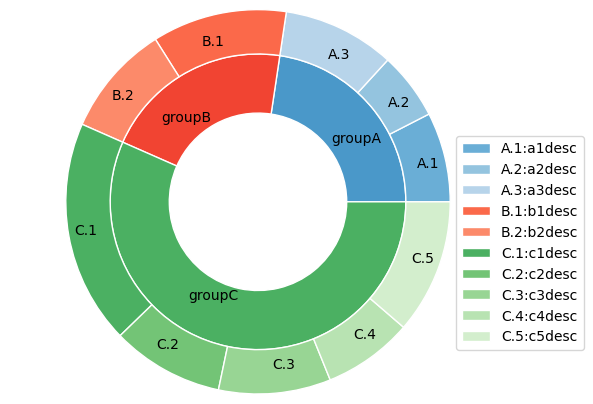

In [13]:


# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 
'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3-0.3, labels=group_names, labeldistance=0.65,colors= 
[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.4, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3, 
labels=subgroup_names, labeldistance=0.85, colors=[a(0.5), a(0.4), 
a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.3, edgecolor='white')
plt.margins(0,0)

plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[3:], subgroup_names_legs, loc=(0.9, 0.1))
plt.show()


## TASK 1:  Split the dataset into 3 parts.   
1. No hpv vaccine.   
2. first dose before <15.   
3. first dose after >= 15   
### Those populations are based on all the patients from the whole datasets no matther which years.

In [198]:
has_empty=df_age_total['2021'].isna().any()
print('total populations until 2021 is',len(df_age_total),',has nan?',has_empty)

total populations until 2021 is 888277 ,has nan? False


In [199]:
df_hpv = pd.concat([df_hpv_nassau,df_hpv_suffolk])

In [202]:
# df_tdap = df_tdap.sort_values(by='vax_year',ascending=True)
df_hpv = df_hpv.sort_values(by=['vax_year','vax_month'],ascending=True)
# df=df.sort_values(by='vax_year',ascending=True)
df_hpv_distinct = df_hpv.drop_duplicates(subset = ['client_id'],keep='first')

In [203]:
print(len(df_hpv_distinct),len(df_hpv))

410778 856446


In [204]:
df_hpv_distinct

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
178819,4771418,1,2008,WHITE,HISPANIC OR LATINO,12,Gardasil,11735.0,Nassau,Nassau,F
179407,4978974,1,2008,WHITE,NOT HISPANIC OR LATINO,13,Gardasil,11757.0,Suffolk,Suffolk,F
255991,6085494,1,2008,UNKNOWN,UNKNOWN,16,Gardasil,11720.0,Suffolk,Suffolk,F
429633,15332074,1,2008,WHITE,NOT HISPANIC OR LATINO,16,Gardasil,11701.0,Suffolk,New York,F
189257,5163813,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,14,Gardasil,11552.0,Nassau,Nassau,F
...,...,...,...,...,...,...,...,...,...,...,...
49687,2914627,12,2021,WHITE,NOT HISPANIC OR LATINO,13,Gardasil 9,11743.0,Suffolk,New York,M
49802,2915577,12,2021,WHITE,NOT HISPANIC OR LATINO,14,Gardasil 9,11776.0,Suffolk,Suffolk,F
48891,2878996,12,2021,OTHER,NOT HISPANIC OR LATINO,13,Gardasil 9,11706.0,Suffolk,Suffolk,M
48781,2876892,12,2021,WHITE,NOT HISPANIC OR LATINO,14,Gardasil 9,11779.0,Suffolk,New York,M


In [205]:
df_filter_hpv= df_hpv_distinct[df_hpv_distinct['PatientAge']<15]


In [207]:
print('The number of populations received first hpv dose after Age 15:',len(df_hpv_distinct) - len(df_filter_hpv))
print('The number of populations received first hpv dose before Age 15:',len(df_filter_hpv))
print('The number of populations didn\'t receive hpv dose:',len(df_age_total) - len(df_hpv_distinct))

The number of populations received first hpv dose after Age 15: 138226
The number of populations received first hpv dose before Age 15: 272552
The number of populations didn't receive hpv dose: 477499


Text(0.5, 1.0, 'Distribution of Hpv First dose Age')

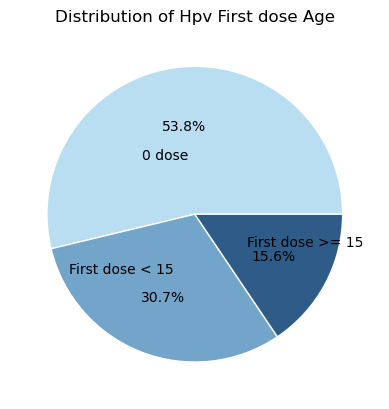

In [208]:
# 11-13 age group
labels = ["0 dose", "First dose < 15", "First dose >= 15"]
value = [len(df_age_total) - len(df_hpv_distinct),len(df_filter_hpv),len(df_hpv_distinct) - len(df_filter_hpv)]
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.4,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Hpv First dose Age')
# plt.show() 

## TASK 2: See the Distribution of Completeness in each Age Group  
1. The age group is divided to < 15 and >= 15 groups  
2. We can tell how many kids receive the complete serious of hpv vaccine

In [209]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']<15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')
group

,count,c
0,1,49312
1,2,163939
2,3,59301


[49312, 163939, 59301]


Text(0.5, 1.0, 'Distribution of Age < 15 kids Hpv Vaccine Completeness')

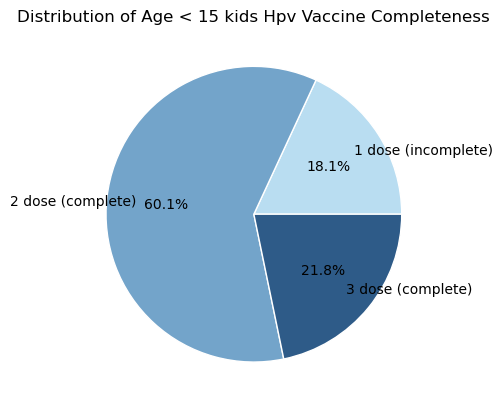

In [210]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']<15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')
# group



labels = ["1 dose (incomplete)", "2 dose (complete)", "3 dose (complete)"]
value = list(group['c'])
print(value)
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.8,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age < 15 kids Hpv Vaccine Completeness')
# plt.show() 

[38598, 37043, 64956]


Text(0.5, 1.0, 'Distribution of Age >= 15 populations Hpv Vaccine Completeness')

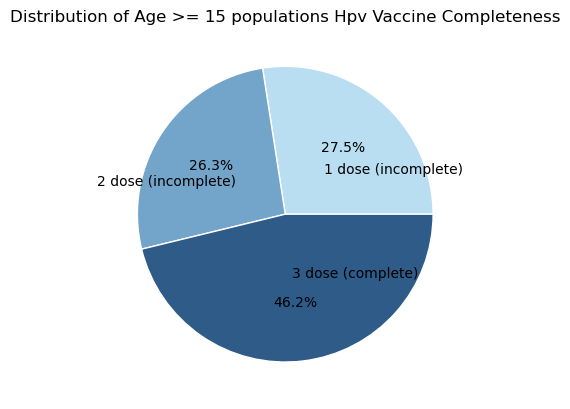

In [75]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']>=15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')



labels = ["1 dose (incomplete)", "2 dose (incomplete)", "3 dose (complete)"]
value = list(group['c'])
print(value)
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.4,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age >= 15 populations Hpv Vaccine Completeness')
# plt.show() 

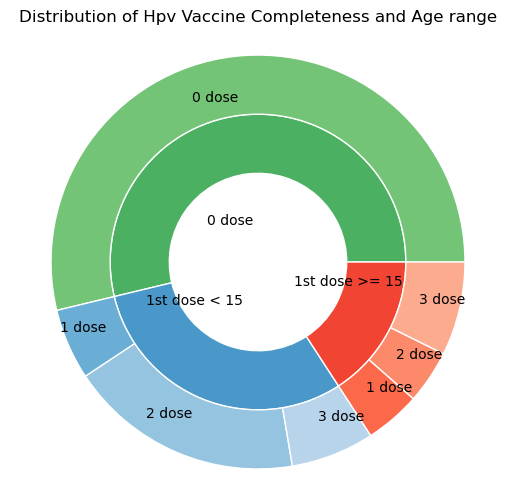

In [211]:


# Make data: I have 3 groups and 7 subgroups
group_names=["0 dose", "1st dose < 15", "1st dose >= 15"]
group_size=[477499, 270181, 140597]
subgroup_names=['0 dose','1 dose', '2 dose', '3 dose', '1 dose', '2 dose', '3 dose']
subgroup_size=[477499,49312, 163025, 57844,38598, 37043, 64956]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# First Ring (inside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.4-0.4, labels=group_names, labeldistance=0.28,colors= 
[c(0.6), a(0.6), b(0.6)] )
plt.setp( mypie, width=0.4, edgecolor='white')

# Second Ring (outside)
mypie2, _ = ax.pie(subgroup_size, radius=1.4, 
labels=subgroup_names, labeldistance=0.8, colors=[c(0.5),a(0.5), a(0.4), 
a(0.3), b(0.5), b(0.4), b(0.3)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

# plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

plt.title('Distribution of Hpv Vaccine Completeness and Age range',pad=40)
# plt.subplots_adjust(top=0.9) 

# ax.legend(handles[3:], subgroup_names_legs, loc=(0.9, 0.1))
plt.show()


## TASK3 Analysis the gap between each dose.

In [239]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']<15)]['client_id'])
clients = set(clients)

patients_u14 = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')
grouped

# group = grouped.groupby(['count']).size().reset_index(name='c')

,client_id,count
0,28751,3
1,34816,3
2,35656,2
3,35786,1
4,46635,2
...,...,...
272547,23573852,2
272548,23574078,2
272549,23574745,2
272550,23577049,2


In [222]:
grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

In [235]:
def SplitClientsByNumberOfDose(patients):
    lst_of_df = []
    grouped = patients.groupby(['client_id']).size().reset_index(name='count')
    print(grouped['count'].unique())
    numbers = list(grouped['count'].unique())
    lst_of_df.append(numbers)
    for number in numbers:
        clients = np.array(grouped[grouped['count']==number]['client_id'])
        clients = set(clients)
        lst_of_df.append(patients[patients['client_id'].isin(clients)]
                         .sort_values(by=['client_id','vax_year','vax_month'],ascending=True).reset_index())
    return lst_of_df,grouped


In [236]:
res,gp = SplitClientsByNumberOfDose(patients_u14)

[3 2 1]


In [237]:
gp

,client_id,count
0,28751,3
1,34816,3
2,35656,2
3,35786,1
4,46635,2
...,...,...
272547,23573852,2
272548,23574078,2
272549,23574745,2
272550,23577049,2


In [226]:
res[2]

,index,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
0,14,35656,10,2012,ASIAN,NOT HISPANIC OR LATINO,14,Gardasil,11791.0,Nassau,Nassau,M
1,15,35656,3,2013,ASIAN,NOT HISPANIC OR LATINO,15,Gardasil,11791.0,Nassau,Nassau,M
2,5,46635,6,2009,WHITE,NOT HISPANIC OR LATINO,11,Gardasil,11967.0,Suffolk,Chautauqua,F
3,6,46635,7,2010,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11967.0,Suffolk,Chautauqua,F
4,7,47959,9,2008,OTHER,UNKNOWN,12,Gardasil,11717.0,Suffolk,New York,F
...,...,...,...,...,...,...,...,...,...,...,...,...
327873,415193,23574745,8,2018,UNKNOWN,UNKNOWN,13,Gardasil 9,11510.0,Nassau,Nassau,F
327874,415194,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F
327875,415195,23577049,6,2020,WHITE,NOT HISPANIC OR LATINO,12,Gardasil 9,11791.0,Nassau,Nassau,F
327876,415196,23577071,6,2019,ASIAN,NOT HISPANIC OR LATINO,12,Gardasil 9,11753.0,Nassau,New York,M


In [227]:
[49312, 163025, 57844]

[49312, 163939, 59301]

[49312, 163939, 59301]

In [228]:
len(patients_u14)

555093

In [229]:
print(len(res[1]),len(res[2]),len(res[3]))

177903 327878 49312


In [233]:
len(res[1])+len(res[2])+len(res[3])

555093

In [231]:
327878/2

163939.0

In [240]:
177903/3

59301.0

In [120]:
patients_u14

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
141766,4399655,2,2008,WHITE,HISPANIC OR LATINO,13,Unspecified,11772.0,Suffolk,Suffolk,F
195533,5413086,3,2008,UNKNOWN,NOT HISPANIC OR LATINO,13,Unspecified,11710.0,Nassau,Nassau,F
47134,2759913,3,2008,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11596.0,Nassau,New York,F
93584,3029209,12,2008,WHITE,NOT HISPANIC OR LATINO,13,Gardasil,11771.0,Nassau,Nassau,F
172386,4580742,7,2008,WHITE,NOT HISPANIC OR LATINO,14,Gardasil,11570.0,Nassau,Nassau,F
...,...,...,...,...,...,...,...,...,...,...,...
118244,4238267,3,2021,WHITE,NOT HISPANIC OR LATINO,14,Gardasil 9,11735.0,Suffolk,Suffolk,M
83792,2924580,8,2021,WHITE,NOT HISPANIC OR LATINO,13,Gardasil 9,11552.0,Nassau,Nassau,M
118245,4238267,10,2021,WHITE,NOT HISPANIC OR LATINO,14,Gardasil,11735.0,Suffolk,Suffolk,M
15413,2045008,4,2021,WHITE,HISPANIC OR LATINO,16,Gardasil 9,11003.0,Nassau,Nassau,F


In [159]:
df['vax_year']

141766    2008
93584     2008
62484     2008
9070      2008
153835    2008
          ... 
118244    2021
83792     2021
118245    2021
15413     2021
16394     2021
Name: vax_year, Length: 326050, dtype: int64

In [167]:
df = res[2]
df

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
141766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47134,2759913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93584,3029209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
118244,4238267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83792,2924580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118245,4238267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15413,2045008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
df = res[2]
gaps = []
for i in range(0,len(df),2):
#     print(df['vax_year'][i+1])
    gap = (df['vax_year'][i+1]-df['vax_year'][i])*12 + df['vax_month'][i+1]-df['vax_month'][i]
#     print(gap)
    gaps.append(gap)


In [196]:
gaps= np.array(gaps)
gaps.max()

150

In [193]:
gaps

[5,
 13,
 13,
 51,
 88,
 7,
 17,
 9,
 14,
 27,
 12,
 16,
 9,
 3,
 8,
 15,
 31,
 34,
 13,
 17,
 7,
 7,
 25,
 58,
 7,
 19,
 18,
 8,
 14,
 13,
 7,
 13,
 7,
 13,
 39,
 13,
 12,
 24,
 19,
 19,
 6,
 11,
 8,
 11,
 12,
 11,
 21,
 12,
 14,
 12,
 14,
 62,
 25,
 6,
 2,
 13,
 12,
 19,
 12,
 33,
 8,
 2,
 6,
 21,
 12,
 6,
 15,
 16,
 27,
 5,
 10,
 15,
 8,
 51,
 23,
 8,
 13,
 12,
 17,
 12,
 17,
 28,
 13,
 6,
 13,
 10,
 12,
 6,
 7,
 7,
 9,
 7,
 14,
 17,
 8,
 6,
 9,
 27,
 12,
 15,
 7,
 10,
 12,
 10,
 6,
 13,
 6,
 14,
 7,
 6,
 6,
 13,
 8,
 9,
 23,
 12,
 11,
 12,
 12,
 14,
 10,
 6,
 8,
 10,
 8,
 11,
 9,
 12,
 6,
 11,
 5,
 10,
 5,
 14,
 5,
 6,
 12,
 11,
 12,
 12,
 6,
 10,
 12,
 11,
 13,
 12,
 13,
 9,
 10,
 9,
 15,
 7,
 12,
 6,
 6,
 10,
 31,
 5,
 5,
 9,
 6,
 6,
 11,
 23,
 7,
 14,
 13,
 7,
 23,
 7,
 9,
 5,
 13,
 6,
 24,
 8,
 6,
 5,
 11,
 6,
 21,
 23,
 5,
 15,
 6,
 14,
 6,
 15,
 9,
 13,
 19,
 10,
 6,
 11,
 6,
 11,
 14,
 13,
 7,
 6,
 13,
 6,
 39,
 12,
 11,
 6,
 9,
 7,
 12,
 21,
 7,
 7,
 7,
 12,
 16,
 16,
 12,


In [186]:
df.loc[10]

index                21356
client_id          2103158
vax_month                1
vax_year              2008
RACE_DESC            OTHER
ETHNICITY_DESC     UNKNOWN
PatientAge              13
Trade_name        Gardasil
PatientZip         11565.0
PatientCounty       Nassau
ProviderCounty      Nassau
GENDER                   F
Name: 10, dtype: object

In [188]:
df.loc[9]

index               265819
client_id          6433333
vax_month                1
vax_year              2008
RACE_DESC          UNKNOWN
ETHNICITY_DESC     UNKNOWN
PatientAge              12
Trade_name        Gardasil
PatientZip         11730.0
PatientCounty      Suffolk
ProviderCounty     Suffolk
GENDER                   F
Name: 9, dtype: object

In [185]:
gaps

[4,
 1,
 5,
 10,
 -9,
 1,
 -5,
 0,
 1,
 1,
 -8,
 2,
 0,
 1,
 -2,
 -5,
 4,
 -4,
 -3,
 -2,
 -1,
 4,
 -1,
 -1,
 4,
 6,
 2,
 1,
 -8,
 -11,
 -1,
 4,
 -5,
 -1,
 3,
 1,
 -10,
 0,
 5,
 -5,
 0,
 9,
 -1,
 2,
 -8,
 -3,
 -2,
 8,
 2,
 0,
 -6,
 6,
 4,
 -8,
 4,
 -5,
 -6,
 3,
 1,
 4,
 2,
 -9,
 2,
 -1,
 -7,
 -6,
 -5,
 -2,
 5,
 9,
 -4,
 0,
 1,
 -4,
 -4,
 1,
 0,
 0,
 -5,
 -3,
 -1,
 -3,
 7,
 -5,
 8,
 -1,
 -4,
 4,
 -5,
 -1,
 -5,
 -2,
 -1,
 6,
 0,
 -1,
 0,
 -1,
 1,
 -1,
 -3,
 5,
 -6,
 -6,
 0,
 -4,
 0,
 -2,
 1,
 -2,
 -4,
 8,
 -9,
 4,
 5,
 -2,
 -1,
 -5,
 0,
 -4,
 0,
 4,
 -10,
 -3,
 0,
 3,
 2,
 -1,
 -10,
 6,
 0,
 9,
 6,
 -7,
 -2,
 -1,
 9,
 1,
 -1,
 9,
 -1,
 5,
 -11,
 -3,
 -6,
 3,
 7,
 -6,
 0,
 11,
 1,
 -9,
 -7,
 4,
 -1,
 -1,
 4,
 2,
 -4,
 -8,
 1,
 7,
 -3,
 -3,
 6,
 1,
 8,
 9,
 -4,
 -2,
 1,
 3,
 -1,
 2,
 -9,
 7,
 3,
 3,
 8,
 0,
 -6,
 -1,
 5,
 0,
 1,
 1,
 -5,
 -5,
 2,
 -2,
 6,
 -5,
 -5,
 -2,
 -4,
 1,
 -5,
 -4,
 -4,
 -2,
 -1,
 2,
 -4,
 0,
 1,
 -6,
 -3,
 0,
 -2,
 -7,
 0,
 -2,
 5,
 -8,
 -6,
 -1,
 3,
 2,
 0,
 -5,
 -

In [131]:
(patients_u14['vax_year'][2+1]-patients_u14['vax_year'][2+1]+1)*12+patients_u14['vax_month'][2+1]

17